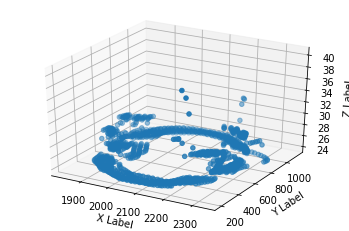

In [4]:
import numpy as np
import networkx as nx
import numpy.random as rnd
import string
import matplotlib.pyplot as plt
from matplotlib import cm

matX = np.genfromtxt('q3dm1-path1.csv',delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1],matX[:,0],matX[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

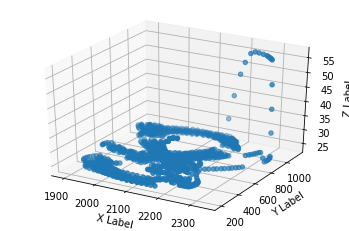

In [5]:
matX1 = np.genfromtxt('q3dm1-path2.csv',delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX1[:,1],matX1[:,0],matX1[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [6]:
def initRingSOM(matX, k):
    """
        Initialize SOM topology as grid.
        
        Input:
            matX: matrix of points
            k   : number of neurons
    """
    # Create graph
    G = nx.generators.lattice.grid_2d_graph(k, 1, periodic=True)
    G = nx.convert_node_labels_to_integers(G)
    
    # Get shape of the matrix
    m, n = matX.shape
    
    # Sample k points from our
    # input matrix as our neurons
    smpl = rnd.choice(m, k, replace=False)
    
    # Add nodes to graph using
    # previously sampled points
    for i, v in enumerate(G):
        G.nodes[v]["w"] = matX[smpl[i], :]

    return G

def trainSOM(matX, G, tmax=1000, sigma0=1., eta0=1.):
    # Get size of the matrix
    m, n = matX.shape
    
    # Compute matrix of squared path length 
    # distances between neurons.
    #
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    # because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    
    # A list of tmax random indices
    smpl = rnd.randint(0, m, size=tmax)
    
    for t in range(tmax):
        # Sample a point x
        vecX = matX[smpl[t], :]
        
        # Determine the best matching unit
        b = np.argmin([np.sum((G.nodes[v]["w"] - vecX)**2) for v in G])
        
        # Update the learning rate
        eta = eta0 * (1. - t/tmax)
        
        # Update the topological adaption rate
        sigma = sigma0 * np.exp(-t/tmax)
        
        # Update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5 * matD[b,i] / sigma**2)
            G.nodes[v]["w"] += eta * h * (vecX - G.nodes[v]["w"])
    
    return G

In [7]:
SOM1 = initRingSOM(matX, 15)

In [8]:
SOM1 = trainSOMV2(matX, SOM1, tmax=1000)

AttributeError: 'Graph' object has no attribute 'node'

In [104]:
list(SOM1.nodes(data=True))

[(0, {'w': array([ 654.0366, 1868.3547,   24.125 ])}),
 (1, {'w': array([ 654.0366, 1868.3547,   24.125 ])}),
 (2, {'w': array([ 654.0366, 1868.3547,   24.125 ])}),
 (3, {'w': array([ 654.01876865, 1868.35386969,   24.125     ])}),
 (4, {'w': array([ 651.92432454, 1868.2563426 ,   24.125     ])}),
 (5, {'w': array([ 651.6249, 1868.2424,   24.125 ])}),
 (6, {'w': array([ 651.6249, 1868.2424,   24.125 ])}),
 (7, {'w': array([ 651.6249, 1868.2424,   24.125 ])}),
 (8, {'w': array([ 651.27164855, 1868.22797303,   24.125     ])}),
 (9, {'w': array([ 644.12508345, 1867.93610356,   24.125     ])}),
 (10, {'w': array([ 644.0344, 1867.9324,   24.125 ])}),
 (11, {'w': array([ 644.0344, 1867.9324,   24.125 ])}),
 (12, {'w': array([ 644.0344, 1867.9324,   24.125 ])}),
 (13, {'w': array([ 661.23003137, 1884.27431003,   24.125     ])}),
 (14, {'w': array([ 628.2995754 , 1903.43542364,   24.125     ])})]

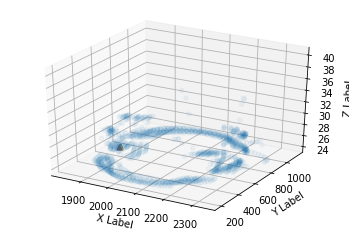

In [99]:
matX = np.genfromtxt('q3dm1-path1.csv',delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1],matX[:,0],matX[:,2], marker='o',alpha=0.05)

for i in range(len(SOM1.nodes())):
    ax.scatter(SOM1.nodes[i]['w'][1],SOM1.nodes[i]['w'][0],SOM1.nodes[i]['w'][2], marker='^')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
SOM1.nodes()[0]['w']